# Challenge 'Le meilleur data scientist de France #1'
[url](https://www.datascience.net/fr/challenge/25/details)

## Importation des librairies

In [1]:
#from matplotlib import rc_file
#rc_file('/Users/samiadrappeau/.matplotlib/journalplotrc/mnras.rc')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
#from matplotlib.ticker import MultipleLocator
%matplotlib inline 
import seaborn as sns

## Importation des données et visualisation des 10 premiers éléments

In [2]:
data_train = pd.read_csv('../data_challenge/boites_medicaments_train.csv', encoding='utf-8', sep=';')
data_test = pd.read_csv('../data_challenge/boites_medicaments_test.csv', encoding='utf-8', sep=';')

# permet de voir toutes les colonnes
pd.set_option("display.max_columns", 99)    
# Visualisons les 10 premières entrées
data_train.head(10)

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,libelle_gelule,libelle_film,libelle_poche,libelle_capsule,nb_plaquette,nb_ampoule,nb_flacon,nb_tube,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix
0,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,1,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,28,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,2014,2014,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),DÉSOGESTREL,2.83
1,plaquette(s) thermoformée(s) aluminium de 28 c...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,2013,2009,Procédure de reconnaissance mutuelle,TEVA SANTE,"MONTÉLUKAST ACIDE, MONTÉLUKAST SODIQUE",14.30
2,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,gélule à libération prolongée,orale,Autorisation active,2000,1996,Procédure nationale,MYLAN SAS,CHLORHYDRATE DE DILTIAZEM,5.66
3,30 sachet(s)-dose(s) papier aluminium complexe...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,granulés à libération prolongée,orale,Autorisation active,2005,2004,Procédure nationale,SANOFI AVENTIS FRANCE,"ACIDE VALPROÏQUE, VALPROATE DE SODIUM",24.27
4,plaquette(s) thermoformée(s) PVC-Aluminium de ...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0.0,Présentation active,Déclaration d'arrêt de commercialisation,non,100%,comprimé pelliculé,orale,Autorisation active,2015,2010,Procédure nationale,TEVA SANTE,LÉTROZOLE,59.94
5,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,100%,comprimé,orale,Autorisation active,2001,2000,Procédure nationale,EG LABO - LABORATOIRES EUROGENERICS,FLUTAMIDE,27.17
6,flacon(s) polyéthylène haute densité (PEHD) de...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,100,0.0,Présentation active,Déclaration de commercialisation,oui,100%,capsule molle,orale,Autorisation active,2015,2001,Procédure centralisée,EISAI (ROYAUME-UNI),BEXAROTÈNE,877.83
7,plaquette(s) thermoformée(s) PVC polyéthylène ...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,oui,65%,comprimé,orale,Autorisation active,2006,2006,Procédure de reconnaissance mutuelle,SANDOZ,GLIMÉPIRIDE,6.58
8,plaquette(s) thermoformée(s) PVC-Aluminium de ...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0.0,Présentation active,Déclaration d'arrêt de commercialisation,oui,65%,comprimé sécable,orale,Autorisation active,2013,2002,Procédure nationale,ARROW GENERIQUES,MALÉATE D'ÉNALAPRIL,18.63
9,plaquette(s) polyamide aluminium PVC de 10 com...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0.0,Présentation active,Déclaration de commercialisation,non,65%,comprimé pelliculé,orale,Autorisation active,2015,2012,Procédure nationale,ARROW GENERIQUES,"CEFPODOXIME PROXÉTIL, CEFPODOXIME",6.13


## Analyse descriptive
### Structures des datasets

In [3]:
print('Les données train ont ' + str(data_train.shape[0]) + ' observables, de ' + str(data_train.shape[1]) + ' variables chacune.')
print('Les données test ont ' + str(data_test.shape[0]) + ' observables, de ' + str(data_test.shape[1]) + ' variables chacune.')

Les données train ont 8564 observables, de 41 variables chacune.
Les données test ont 3671 observables, de 41 variables chacune.


Il est **très** important de lire la [description des variables](https://www.datascience.net/fr/challenge/25/details#tab_brief71), afin de correctement appréhender le problème.

### Que cherchons-nous à prédire?
Nous cherchons à développer un modèle prédictif permettant d'estimer le coût d'une boîte de médicament.

Commençons donc par étudier la distribution des prix dans les données train.

### Description des données

In [4]:
data_train['prix'].value_counts()

6.36      364
18.63     333
8.14       93
23.71      86
7.55       81
1.08       79
3.94       79
7.21       74
5.27       68
3.49       65
8.13       57
5.91       48
1.88       48
22.04      46
23.49      40
14.86      40
20.15      38
4.82       37
5.90       37
3.79       36
6.25       36
8.92       34
27.50      32
18.14      32
7.73       31
9.62       31
1.59       31
14.79      31
29.09      30
14.20      30
         ... 
5.19        1
6.44        1
779.22      1
34.63       1
794.29      1
43.65       1
121.79      1
0.98        1
2.98        1
3.24        1
8.74        1
9.49        1
6.29        1
10.01       1
8.76        1
63.90       1
6.76        1
749.29      1
31.09       1
58.46       1
56.40       1
54.40       1
50.27       1
49.52       1
48.65       1
25.12       1
46.15       1
45.21       1
23.12       1
0.75        1
Name: prix, dtype: int64

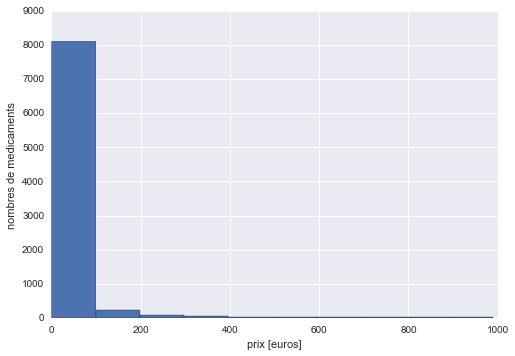

In [5]:
ax = data_train['prix'].hist()
ax.set_xlabel('prix [euros]')
ax.set_ylabel('nombres de medicaments')

Ce n'est pas très joli. Essayons d'améliorer les choses en prenant le logarithme des prix.

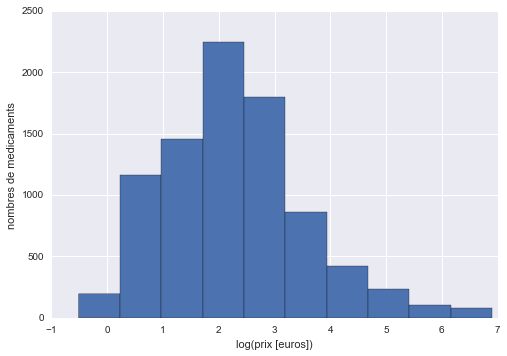

In [6]:
data_train['logprix'] = data_train['prix'].apply(np.log)
ax = data_train['logprix'].hist()
ax.set_xlabel('log(prix [euros])')
ax.set_ylabel('nombres de medicaments')

C'est un peu plus joli. Nous avons une belle distribution, proche d'une gaussienne.

Observons maintenant l'influence de deux variables sur le prix final des médicaments : le taux de remboursement de la Sécurité Sociale et le statut administratif de la boîte.

Pour cela, nous allons utiliser la fonction *violinplot()* de Seaborn. La [documentation](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) donne une description de la fonction :
>Draw a combination of boxplot and kernel density estimate.

>A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across >several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box >plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density >estimation of the underlying distribution.

Un *kernel density estimate* (ou *Estimation du noyau* en français) est une fonction de probabilité.

Quelques définitions :  
**Kernel** : c'est un type particulier de fonction de probabilité qui a la propriété d'être paire.  
**KDE** : c'est une méthode non-paramétrique d'estimation de la fonction de probabilité d'une variable aléatoire continue.  
**Non-paramétrique** : n'assume aucune distribution sous-jacente de la variable.

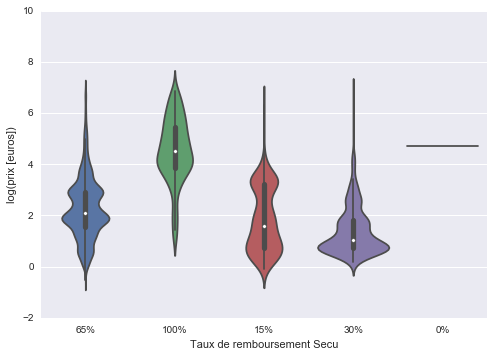

In [7]:
# Influence du taux de remboursement sur le prix
ax = sns.violinplot(y="logprix", x="tx rembours", data=data_train)
ax.set_xlabel('Taux de remboursement Secu')
ax.set_ylabel('log(prix [euros])')

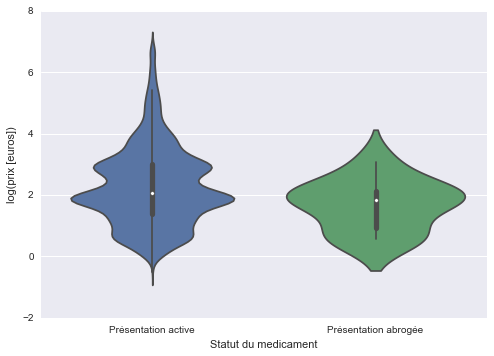

In [8]:
# Influence du statut du medicament sur son prix
ax = sns.violinplot(y="logprix", x="statut", data=data_train)
ax.set_xlabel('Statut du medicament')
ax.set_ylabel('log(prix [euros])')

# XXX INSERT HERE DESCRIPTION OF DISTRIBUTION

## Préparation des données
### Séparation des différents types de variables
Nous constatons, en analysant les variables disponibles, qu'elles sont de quatre types différentes :
* numérique  
* catégorielle  
* date  
* texte

Séparons les donc :

In [9]:
# variables numériques
var_num = ['libelle_plaquette', 'libelle_ampoule', 'libelle_flacon', 
            'libelle_tube', 'libelle_stylo', 'libelle_seringue',
            'libelle_pilulier', 'libelle_sachet', 'libelle_comprime', 
            'libelle_gelule', 'libelle_film', 'libelle_poche',
            'libelle_capsule'] + ['nb_plaquette', 'nb_ampoule', 
            'nb_flacon', 'nb_tube', 'nb_stylo', 'nb_seringue',
            'nb_pilulier', 'nb_sachet', 'nb_comprime', 'nb_gelule', 
            'nb_film', 'nb_poche', 'nb_capsule', 'nb_ml']
# variables catégorielles
var_cat = ['statut', 'etat commerc', 'agrement col', 'tx rembours',
          'voies admin', 'statut admin', 'type proc']
# variables dates
var_dates = ['date declar annee', 'date amm annee']

# variable texte
var_txt = ['libelle', 'titulaires', 'substances', 'forme pharma']

### Encodage des variables catégorielles
Nous avons besoin de transformer les variables catégorielles en nombre, afin de pouvoir les utiliser dans les algorithmes de machine learning (qui nécessitent des nombres comme paramètres d'entrée).

Pour cela, nous allons utiliser la fonction [*LabelEncoder()*](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [10]:
data_train[var_cat].head(10)

,statut,etat commerc,agrement col,tx rembours,voies admin,statut admin,type proc
0,Présentation active,Déclaration de commercialisation,oui,65%,orale,Autorisation active,Procédure décentralisée
1,Présentation active,Déclaration de commercialisation,oui,65%,orale,Autorisation active,Procédure de reconnaissance mutuelle
2,Présentation active,Déclaration de commercialisation,oui,65%,orale,Autorisation active,Procédure nationale
3,Présentation active,Déclaration de commercialisation,oui,65%,orale,Autorisation active,Procédure nationale
4,Présentation active,Déclaration d'arrêt de commercialisation,non,100%,orale,Autorisation active,Procédure nationale
5,Présentation active,Déclaration de commercialisation,oui,100%,orale,Autorisation active,Procédure nationale
6,Présentation active,Déclaration de commercialisation,oui,100%,orale,Autorisation active,Procédure centralisée
7,Présentation active,Déclaration de commercialisation,oui,65%,orale,Autorisation active,Procédure de reconnaissance mutuelle
8,Présentation active,Déclaration d'arrêt de commercialisation,oui,65%,orale,Autorisation active,Procédure nationale
9,Présentation active,Déclaration de commercialisation,non,65%,orale,Autorisation active,Procédure nationale


In [11]:
for c in var_cat:
    le = LabelEncoder()
    le.fit(data_train[c].append(data_test[c]))
    data_train[c] = le.transform(data_train[c])
    data_test[c] = le.transform(data_test[c])

In [12]:
data_train[var_cat].head(10)

,statut,etat commerc,agrement col,tx rembours,voies admin,statut admin,type proc
0,1,2,1,4,66,1,3
1,1,2,1,4,66,1,2
2,1,2,1,4,66,1,4
3,1,2,1,4,66,1,4
4,1,1,0,1,66,1,4
5,1,2,1,1,66,1,4
6,1,2,1,1,66,1,1
7,1,2,1,4,66,1,2
8,1,1,1,4,66,1,4
9,1,2,0,4,66,1,4


## Création du modèle prédictif
Nous sommes maintenant prêt à définir un modèle prédictif des prix des médicaments.

Nous allons tester plusieurs modèles :
* Random forest  
* XXX ADD EACH MODEL TESTED

Nous allons également utiliser toutes les variables à notre disposition, excepté les variables textuelles.

Enfin, afin d'éviter le [surapprentissage](https://fr.wikipedia.org/wiki/Surapprentissage) et correctement estimer les performances de nos modèles, nous allons utiliser la [validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e) avec le critère *k-fold*.

### Critère de performance
Le challenge utilise la métrique [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error). Celle-ci n'étant pas disponible dans sklearn, nous la codons manuellement :

In [13]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Validation croisée
[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html) de la fonction KFold() de validation croisée de sklearn.

> K-Folds cross validation iterator.  
> Provides train/test indices to split data in train test sets. Split dataset into k consecutive folds (without shuffling by default).  
> Each fold is then used a validation set once while the k - 1 remaining fold form the training set.

Prend comme paramètres d'entrée :
* le nombre total d'éléments, ici data_train.shape[0] = 8564  
* le nombre de fold à effectuer, ici NBROUND = 5

In [21]:
err = 0
NBROUND = 5
VARIABLES = var_num+var_cat+var_dates
for train_index, test_index in KFold(data_train.shape[0], n_folds=NBROUND):
    y = data_train['logprix']
    X = data_train[VARIABLES]
    X_train, X_test = X.ix[train_index, :], X.ix[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    # Random Forest model
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    # ne pas oublier de reprendre l'exponentielle de la prédiction
    err += mape_error(np.exp(y_test), np.exp(pred))
    print (mape_error(np.exp(y_test), np.exp(pred)))
print ("*** MAPE Error : ", err / NBROUND)

63.51551380183393
65.65351979301067
57.25236562028881
60.26475479135192
58.35921217285125
*** MAPE Error :  61.00907323586732


Notre modèle *Random Forest* prédit les prix des médicaments avec une erreur d'environ 61%. Pour un prix de médicament réel de 10€, notre modèle prédira soit 3.9€, soit 16.1€.

## Prédictions et soumission
### Calcul des prédictions
Nous allons maintenant entrainer notre modèle sur l'intégralité des données train, avant d'effectuer une prédiction pour les données test.

In [22]:
clf = RandomForestRegressor()
clf.fit(data_train[VARIABLES], data_train['logprix'])
# ATTENTION !! Bien penser à transformer les prédictions obtenues dans l'espace linéaire.
predictions = np.exp(clf.predict(data_test[VARIABLES]))

### Création du fichier de soumission
Sauvegardons maintenant nos prédictions dans le *soumission.csv* pour le soumettre à datascience.net

In [24]:
pd.DataFrame(predictions, index=data_test['id']).to_csv('soumission.csv',  
                          header=['prix'],
                          sep = ';')

# Félicitations
Nous venons d'analyser notre premier set de donnée. Soumettons notre fichier afin de comparer notre modèle à celui des autres Data Scientist du challenge. Puis amusons-nous à améliorer ce modèle !